# Week 5: Exploratory Data Analysis - LVC 

<a id="eda"></a>
## 1. What is Exploratory Data Analysis?

Exploratory data analysis is an important step in any research analysis. It searches for patterns and relationships in the data. In other words, we may explain EDA as a process to summarise the crucial characteristics of the data to get better insights.<br>
We explore each dataset using multiple techniques and compare the results

**Data analysis is divided into the following parts:**

### 1. Descriptive Statistics:

Descriptive statistics summarize a given data set. It includes measures of central tendency, measures of variation and distribution of the data.
<br> The **measures of central tendency** include the mean, median, and mode, while **measures of variability** include the standard deviation, variance, the coefficient of variation, and so on.

### 2. Inferential Statistics:
Inferential statistics are procedures that help in making inferences about a population based on findings from a sample.<br>
It includes **testing of hypothesis** and **parameter estimation**. It allows us to infer parameters of the population based on sample and build models on it.


### What are Population and Sample?
The population is a complete set of elements having some common characteristics selected for a research study.<br>
A sample is a set of randomly chosen observations from a population. Samples are drawn from the population when a dataset is large since it is challenging to study the whole population. We draw a sample when the item under study is feared to exhaust. For instance,<br> 
<ul>
    <li>the study of the durability of an electric bulb </li>
        <li>the study of the effectiveness of new medicine</li>
</ul> 

<a id="data"></a>
## 2. Working with a Dataset

In [1]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

<a id="read_data"> </a>
## 2.1 Read the data

We are using the `k-circlesales` dataset. Let us explore the data with some statistical metrics.


In [3]:
df = pd.read_csv('k_circle_sales.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


<a id="variable"> </a>
## 2.2 Variable type

Identifying the type of variable we are working with is always the first step of the data analysis process. We classify the variables as follows:
<ol>
    <li><b>Numerical (quantitative)</b></li>
    <ul><li>Continuous - A random variable which takes continuous values, i.e. values within a range, usually measured, such as height (within the range of human heights)</li>
        <li>Discrete -  A random variable which takes discrete values, i.e. values from the set of whole numbers only. It can take countably finite values</li></ul><br>
    <li><b>Categorical (qualitative)</b></li>
    <ul>
        <li> Ordinal - Values that have inherent ordering levels, such as (high, medium, low)</li>
        <li>Nominal - Nominal data has no order. The values represent discrete units and are used to label variables (male or female)</li></ul>
</ol>  
Data has categorical and/or numerical variables. The main data types stored in pandas dataframes are object, float, int, boolean and datetime64. It is important to check whether the data types are correctly identified by python.<br>

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7774 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [15]:
df.shape

(8523, 13)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7774.0,11.676740,5.776851,0.00,7.720000,11.800000,16.500000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.00,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.998838,62.258099,31.30,93.800000,142.700000,185.650000,266.900000
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.00,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.29,834.247400,1794.331000,3101.296400,13086.964800
Profit,8523.0,13.414514,1.701840,0.10,13.150000,13.900000,14.300000,24.000000


<a id="central_tendency"> </a>
## 3. Measures of Central Tendency

Let us now understand the measures of central tendency.

<a id="mean"></a>
### 3.1 Mean
<ul>
  <li>Mean is the average of the data</li>
  <li>The important property of the mean is that it includes all values in the data. Thus it can be affected by the outliers. Presence of outliers can give unreliable results    
</ul>


The answer to the questions above is to find the mean. Let us use the function `.mean()`

In [4]:
df['Item_Weight'].mean()

11.67673977360451

<a id="median"></a>
### 3.2 Median
<ul>
  <li>The median value is the middlemost value of the dataset, it divides the data into two equal halves. Thus, it is a positional value</li>
     <li>It cannot be obtained for categorical variables</li>
  <li>Unlike mean, the median value is not affected by extreme values</li>
    <li>The median value is at times used to impute the missing values in the data</li>
</ul>

In [5]:
df['Item_Weight'].median()

11.8

<a id="mode"></a>
### 3.3 Mode
<ul>
  <li> Mode of the data is the value which has the highest frequency</li>
  <li>It is a measure that can be used for categorical variables. Example: gender</li>
</ul>  

In [6]:
df['Item_Fat_Content'].mode()

0    Low Fat
dtype: object

In [7]:
df['Item_Fat_Content'].mode()[0]

'Low Fat'

In [7]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

<a id="dispersion"> </a>
## 4 Measure of Dispersion
<br>
<b><ul>
  <li>The measure of dispersion indicates the variability within a set of measures</li>
  <li>Less variability implies more data is closer to the central observations. More variability implies more data is spread further away from the center
</li>
  <li>The most popular variability measures are the range, interquartile range (IQR), variance, and standard deviation
</li>
</ul> </b> 

<a id="range"> </a>
### 4.1 Range
<ul>
  <li>The range represents the difference between the largest and the smallest points in the data</li>
    <li>In spite of being very easy to define and calculate, it is not a reliable measure</li>
    <li>It is highly affected by extreme values</li>
</ul>  


In [8]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [10]:
df['Item_MRP'].max()-df['Item_MRP'].min()

235.59999999999997

<a id="variance"> </a>
### 4.2 Variance
<ul>
  <li>Variance measure the dispersion of the data from the mean</li>
  <li>It is an average of the sum of squares of difference between an observation and the mean. Thus the variance is always positive</li>
    <li>The variance is based on all the observations</li>
</ul>

In [11]:
df['Item_MRP'].var()

3876.0708845928852

<a id="std"> </a>
### 4.3 Standard Deviation

<ol>
    <li> Standard deviation is the positive square root of the variance </li>
    <li> It has the same unit as that of the observations</li>
    <li> Like variance, it also measures the variability of the observations from the mean </li>
    </ol>

In [12]:
df['Item_MRP'].std()

62.2580989477906

<a id="cv"> </a>
### 4.4 Coefficient of Variation
<ul>
    <li>The coefficient of variation is a statistical measure of dispersion of data points around the mean</li>
    <li>It is a unit free measure and is always expressed in percentage</li>
    <li>We compare the coefficient of variation in order to decide which of the two sets of observations has more spread</li>
    </ul>

## coefficient of variation = Standard deviation/ Mean
## % of variation = Standard deviation/ Mean * 100

In [13]:
print('coefficient of variation:',df['Item_MRP'].std()/df['Item_MRP'].mean())
print('% of variation:',df['Item_MRP'].std()/df['Item_MRP'].mean() * 100)

coefficient of variation: 0.4415504385557973
% of variation: 44.15504385557973


<a id="shape"> </a>
## 5 Shape of the data

<a id="skewness"> </a>
### 5.1 Skewness
<ul>
  <li>Skewness helps us to study the shape of the data.</li>
  <li>It represents how much a distribution differs from a normal distribution, either to the left or to the right.</li>
    <li>The value of the skewness can be either positive, negative or zero.</li>
</ul>  

In [16]:
df.skew()

Item_Weight                 -0.352215
Item_Visibility              1.167091
Item_MRP                     0.127390
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
Profit                      -3.379808
dtype: float64

<a id="kurtosis"> </a>
### 5.2 Kurtosis
<ul>
    <li> Kurtosis measures the peakedness of the distribution</li>
   <li>In other words, kurtosis is a statistical measure that defines how the tails of the distribution differ from the normal distribution</li>
       <li>Kurtosis identifies whether the tails of a given distribution contain extreme values</li>
</ul>  

To find the kurtosis of the data, we find use the function `kurt()`

In [17]:
df.kurt()

Item_Weight                  -0.613755
Item_Visibility               1.679445
Item_MRP                     -0.887901
Outlet_Establishment_Year    -1.205694
Item_Outlet_Sales             1.615877
Profit                       16.965881
dtype: float64

In [18]:
df['Item_MRP'].kurt()

-0.8879008549272447

<a id="corr_cov"> </a>
## 6. Covariance and Correlation

<a id="corr"></a>
### 6.1 Correlation
  <li>It shows whether pairs of variables are related to each other</li>
  <li>If there is correlation, it shows how strong the correlation is</li>
  <li>Correlation takes values between -1 to +1, where values close to +1 represents strong positive correlation while values close to -1 represents strong negative correlation</li>
</ul>  


In [19]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
Item_Weight,1.000000,-0.055081,0.020616,0.365815,-0.034997,-0.016058
Item_Visibility,-0.055081,1.000000,-0.001597,-0.074834,-0.128625,0.014269
Item_MRP,0.020616,-0.001597,1.000000,0.005046,0.567555,0.004109
Outlet_Establishment_Year,0.365815,-0.074834,0.005046,1.000000,-0.049135,-0.019674
Item_Outlet_Sales,-0.034997,-0.128625,0.567555,-0.049135,1.000000,0.000951
Profit,-0.016058,0.014269,0.004109,-0.019674,0.000951,1.000000


<a id="cov"> </a>
## 6.2 Covariance

<ul>
  <li>It is the relationship between a pair of random variables where change in one variable causes change in another variable</li>
  <li>It can take any value between -infinity to +infinity, where the negative value represents the negative relationship whereas a positive value represents the positive relationship</li>
</ul>  

</body>
</html>

In [20]:
df.cov()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
Item_Weight,33.372008,-0.016030,7.425851,16.293339,-3.295708e+02,-0.160196
Item_Visibility,-0.016030,0.002662,-0.005131,-0.032325,-1.132561e+01,0.001253
Item_MRP,7.425851,-0.005131,3876.070885,2.629821,6.029901e+04,0.435364
Outlet_Establishment_Year,16.293339,-0.032325,2.629821,70.086372,-7.019621e+02,-0.280298
Item_Outlet_Sales,-329.570782,-11.325611,60299.006078,-701.962133,2.912141e+06,2.762921
Profit,-0.160196,0.001253,0.435364,-0.280298,2.762921e+00,2.896258


In [18]:
df['Item_Weight'].var()

33.37200778908514

# Data Visualization

**There are different visualization libraries in python that provides an interface for drawing various graphics. Some most widely used libraries are Matplotlib, Seaborn**

#### Import the required libraries  

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# load the 'tips' dataset from seaborn
df_tips = sns.load_dataset('tips')

# display head() of the dataset
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<a id="matplotlib"> </a>
## 1. Plots using Matplotlib

Matplotlib is a Python 2D plotting library. Many libraries are built based on it and use its functions in the backend. pyplot is a subpackage of matplotlib that provides a MATLAB-like way of plotting. <br><br>
                        matplotlib.pyplot is a mostly used package because it is elementary to use, and it generates plots in less time.

**How to install Matplotlib?**<br>
1. You can use-<br>
`!pip install matplotlib`<br>

### 1.1 Line Plot
A line graph is the most uncomplicated plot that displays the relationship between the one independent and one dependent dataset. In this plot, the points are joined by straight line segments.

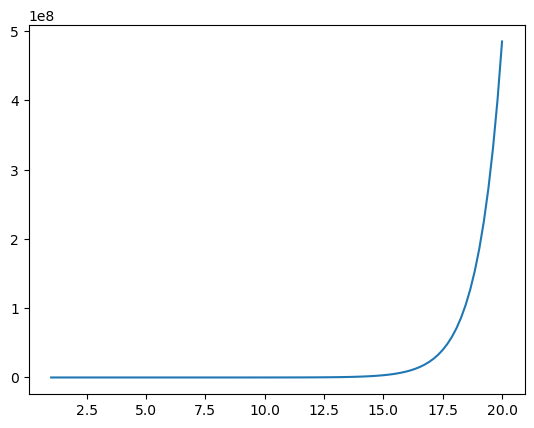

In [21]:
# data
# create an array using linspace
X = np.linspace(1,20,100)
# create an array by taking exponential of X
Y = np.exp(X)

# line plot
plt.plot(X,Y)

# display the plot
plt.show()

From the plot, it can be observed that as X increases, Y  increases exponential.


**The above plot can be represented not only by a solid line, but also a dotted line with varied thickness. The points can be marked explicitly using any symbol.**

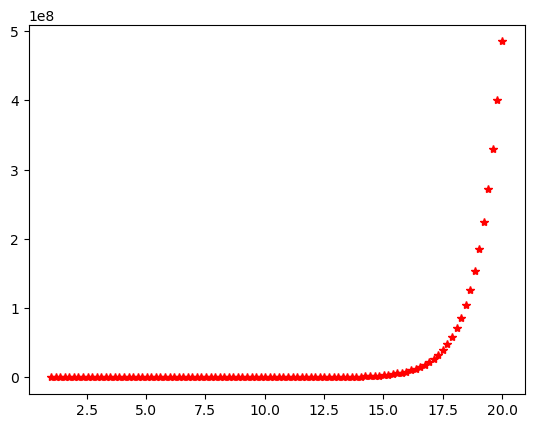

In [22]:
# data
# create an array using linspace
X = np.linspace(1,20,100)
# create an array by taking exponential of X
Y = np.exp(X)

# line plot
# the argument 'r*' plots each point as a red '*' 
plt.plot(X,Y, 'r*')

# display the plot
plt.show()

We can change the colours or shapes of the data points.

There can be multiple line plots in one plot. Let us plot three plots together in a single graph. Also, add a plot title.

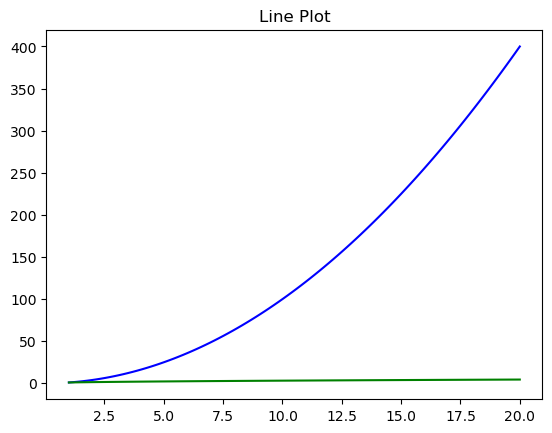

In [23]:
# data
# create an array using linspace
X = np.linspace(1,20,100)
# create an array by taking square of X
Y_square = np.square(X)
# create an array by taking squareroot of X
Y_sqrt = np.sqrt(X)

# line plot
plt.plot( X,Y_square,'b', X,Y_sqrt,'g')

# add title to the plot
plt.title('Line Plot')

# display the plot
plt.show()

### 1.2 Scatter Plot

A scatter plot is a set of points plotted on horizontal and vertical axes. The scatter plot can be used to study the correlation between the two variables. One can also detect the extreme data points using a scatter plot.

In [24]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Plot the scatter plot for the variables 'total_bill' and 'tip'

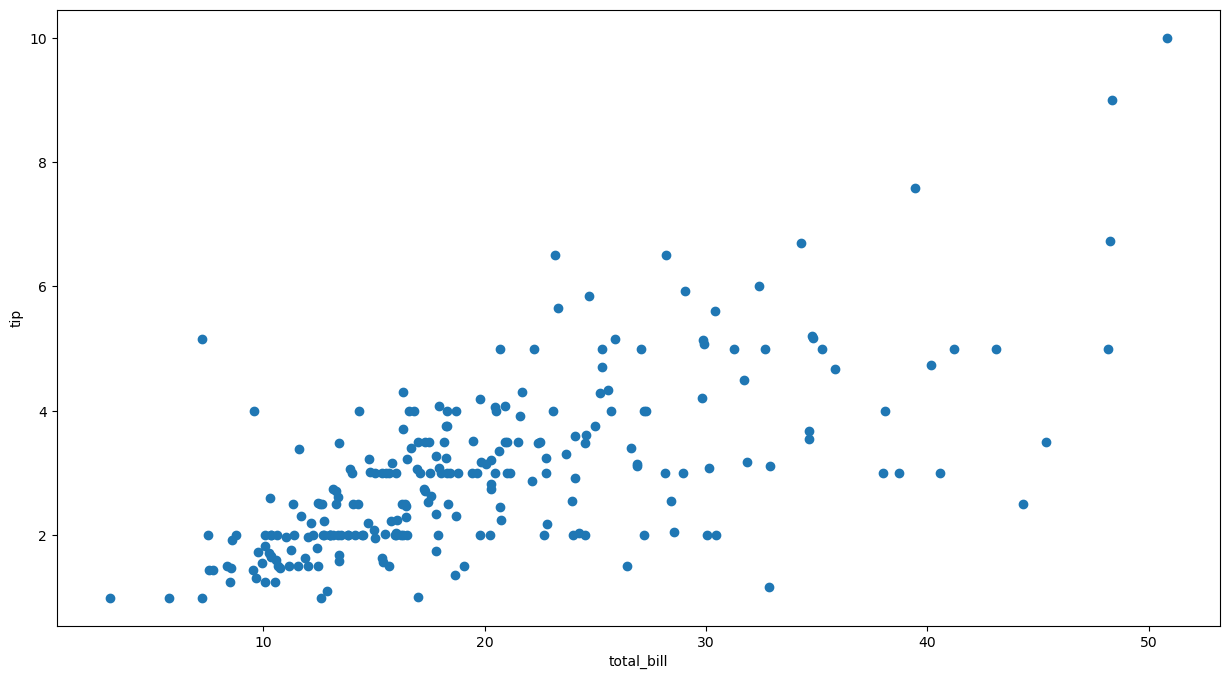

In [25]:
# data
# let X be the column of total bill
X = df_tips['total_bill']
# let Y be the column of the tip collected
Y = df_tips['tip']

# set the plot size
plt.figure(figsize=(15,8))

# plot the scatter plot
plt.scatter(X,Y)

# add the axes labels to the plot
plt.xlabel('total_bill')
plt.ylabel('tip')

# display the plot
plt.show()

We can add different colours, opacity, and shape of data points. Let us customize the above plot.

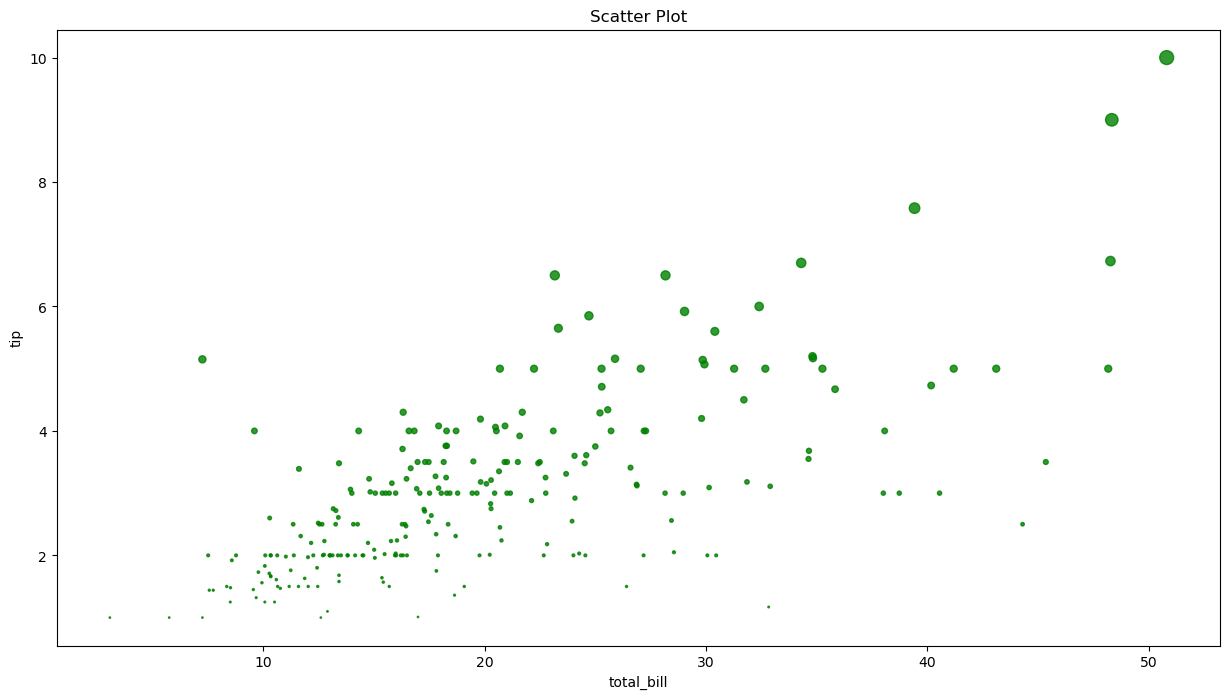

In [26]:
# plot the scatter plot for the variables 'total_bill' and 'tip'

# data
# let X be the column of total bill
X = df_tips['total_bill']
# let Y be the column of the tip collected
Y = df_tips['tip']

# set the plot size
plt.figure(figsize=(15,8))

# plot the scatter plot
# s is for shape, c is for colour, alpha is for opacity (0 < alpha < 1)
plt.scatter(X, Y, s = np.array(Y)**2, c= 'green', alpha= 0.8)

# add title 
plt.title('Scatter Plot')

# add the axes labels to the plot
plt.xlabel('total_bill')
plt.ylabel('tip')

# display the plot
plt.show()

The bubbles with higher radius display that the tip amount is more as compared to the bubbles with less radius.

### 1.3 Bar Plot
 To display categorical data use a  bar plot with bars having lengths proportional to the values that they represent. The comparison between different categories of a categorical variable can be made by studying a bar plot. <br><br>
                        In the vertical bar plot, the X-axis displays the categorical variable, and Y-axis contains the values corresponding to different categories.

In [27]:
# the variable 'smoker' is categorical
# check categories in the variable
set(df_tips['smoker'])

{'No', 'Yes'}

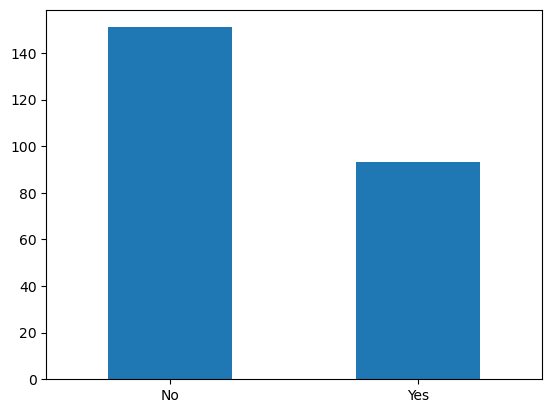

In [28]:
# bar plot to get the count of smokers and non-smokers in the data

# kind='bar' plots a bar plot
# 'rot = 0' returns the categoric labels horizontally
df_tips.smoker.value_counts().plot(kind='bar', rot = 0)

# display the plot
plt.show()

### 1.4 Pie Plot
Pie plot is a graphical representation of univariate data. It is a circular graph divided into slices displaying the numerical proportion. For the categorical variable, each slice of the pie plot corresponds to each of the categories.

In [29]:
# check the head() of the tips dataset
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
# categories in the 'day' variable
df_tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

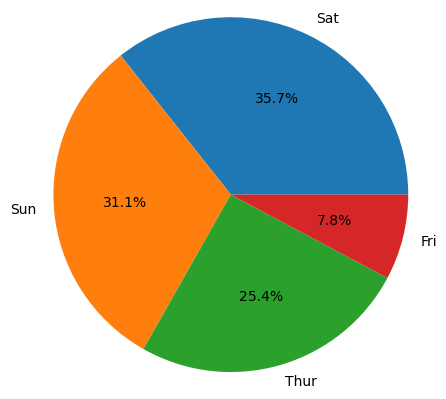

In [31]:
# plot the occurrence of different days in the dataset

# 'autopct' displays the percentage upto 1 decimal place
# 'radius' sets the radius of the pie plot
# 'labels' are the labels given to each section 
plt.pie(df_tips.day.value_counts(), autopct = '%.1f%%', radius = 1.2, labels = ['Sat', 'Sun','Thur','Fri'])

# display the plot
plt.show()

From the above pie plot, we see that the data has a high proportion for Saturday followed by Sunday.


**Exploded pie plot** is a plot in which one or more sectors are separated from the disc

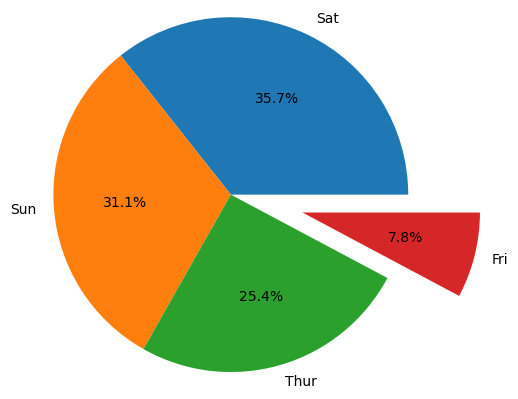

In [32]:
# plot the occurrence of different days in the dataset

# 'autopct' displays the percentage upto 1 decimal place
# 'radius' sets the radius of the pie plot
# 'labels' are the labels given to each section 
# 'explode' specifies the radius with which to offset each section
plt.pie(df_tips.day.value_counts(), autopct = '%.1f%%', radius = 1.2, labels = ['Sat', 'Sun','Thur','Fri'],
        explode = [0,0,0,0.5])

# display the plot
plt.show()

### 1.5 Histogram
A histogram is used to display the distribution and spread of the continuous variable. One axis represents the range of variable, and the other axis shows the frequency of the data points. In a histogram, there are no gaps between the bars.

In tips dataset, 'tip' is the continuous variable. Let us plot the histogram to understand the distribution of the variable.

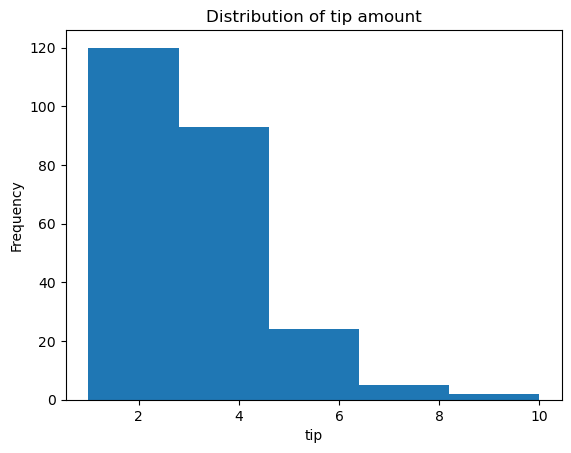

In [33]:
# plot the histogram
# specify the number of bins, using 'bins' parameter
plt.hist(df_tips['tip'], bins= 5)

# add the graph title 
plt.title('Distribution of tip amount')

# add th x-axis label
plt.xlabel('tip')

# # add th y-axis label
plt.ylabel('Frequency')

# display the plot
plt.show()

From the above plot, we can see that the tip amount is positively skewed. 

### 1.6 Box Plot
Boxplot is a way to visualize the five-number summary of the variable. The five-number summary includes the numerical quantities like minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. It gives information about the outliers in the data. Detecting and removing outliers is one of the essential steps in exploratory data analysis. Boxplots also tells about the distribution of the data.

Plot the boxplot of 'total_bill' to check the distribution and presence of outliers in the variable.

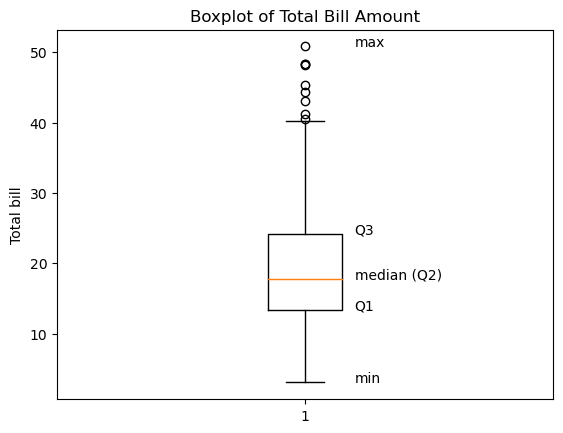

In [34]:
# plot a boxplot of total bill
plt.boxplot(df_tips['total_bill'])

# add labels for five number summary using text()
# x is location on x-axis
# y is the location on y-axis
# s is the text 
plt.text(x = 1.1, y = df_tips['total_bill'].min(), s ='min')              # for minimun
plt.text(x = 1.1, y = df_tips.total_bill.quantile(0.25), s ='Q1')         # for quartile 1
plt.text(x = 1.1, y = df_tips['total_bill'].median(), s ='median (Q2)')   # for quartile 2
plt.text(x = 1.1, y = df_tips.total_bill.quantile(0.75), s ='Q3')         # for quartile 3
plt.text(x = 1.1, y = df_tips['total_bill'].max(), s ='max')              # for maximum


# add the graph title 
plt.title('Boxplot of Total Bill Amount')

# add the y-axis label
plt.ylabel('Total bill')

# display the plot
plt.show()

### 1.7 Area Plot
Area plot is a graphical representation of quantitative data based on the line plot. The area under the line plot is shaded. <br>
                        Usually, it is used to compare the two or more quantities.

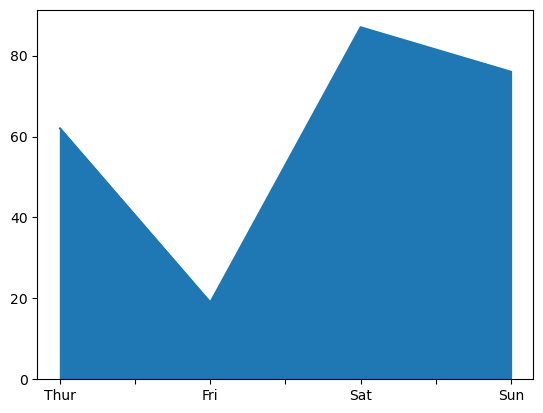

In [35]:
# value_counts counts the number of observations for each day
# sorts the index - thursday to be first
# plot.area() plots area plot
df_tips['day'].value_counts().sort_index().plot.area() 

# display the plot
plt.show()

The above plot gives the count of observations for each day. We see that the highest number of tips collected are on Saturday. 

<a id="seaborn"> </a>
## 2. Plots using Seaborn

Seaborn is a Python visualization library based on matplotlib. The library provides a high-level interface for plotting statistical graphics. As the library uses matplotlib in the backend, we can use the functions in matplotlib along with functions in seaborn.<br><br>
Various functions in the seaborn library allow us to plot complex and advance statistical plots such as linear/higher-order regression, univariate/multivariate distribution, violin, swarm, strip plots, correlations.

**How to install Seaborn?**<br>
1. You can use-<br>`!pip install seaborn`<br>

### 2.1 Strip Plot

The strip plot resembles a scatterplot when one variable is categorical. This plot can help study the underlying distribution of the data. 

In [36]:
# check the head() of the tips dataset
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Plot a strip plot to check the relationship between the variables 'tip' and 'time'

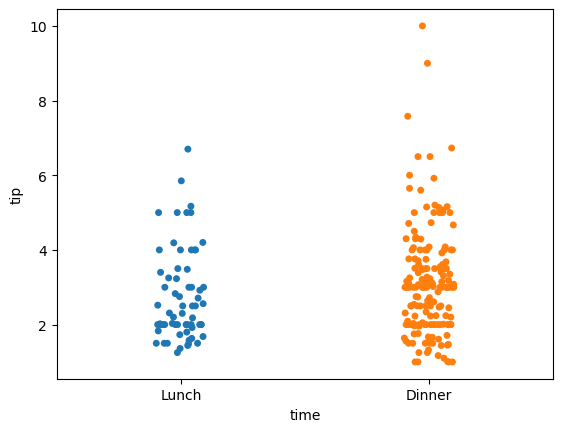

In [37]:
# strip plot
# data specifies the DataFrame to be used
sns.stripplot(y = 'tip', x = 'time', data = df_tips)

# display the plot
plt.show()

We see that the tip amount is more at dinner time than at lunchtime. Nevertheless, the above plot is unable to display the spread of the data. We can plot the points with spread using the 'jitter' parameter in the strip plot function.

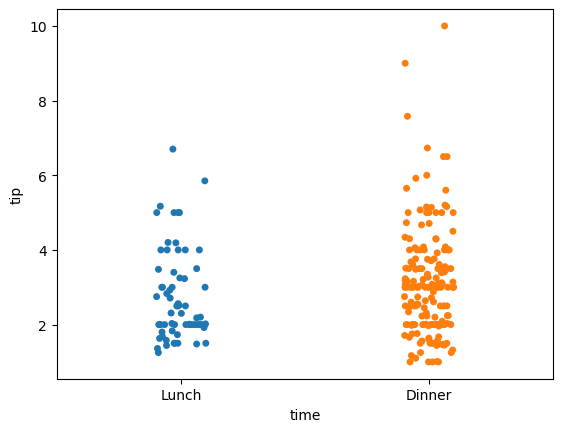

In [38]:
# strip plot
# data specifies the DataFrame to be used
# jitter to spread the points
sns.stripplot(y = 'tip', x = 'time', data = df_tips, jitter = True)

# display the plot
plt.show()

The plot shows most of the observations the tip amount is in the range 1 to 4 irrespective of time.

### 2.2 Swarm Plot
The swarm plot is similar to the strip plot, but it avoids the overlapping of the points, giving a better representation of the distribution of the data. 

Plot the swarm plot for the variables 'tip' and 'time'. 

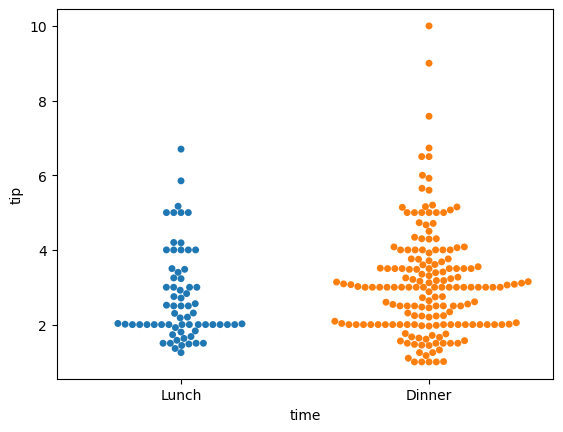

In [39]:
# swarm plot
# data specifies the DataFrame to be used
sns.swarmplot(y = 'tip', x = 'time', data = df_tips)

# display the plot
plt.show()

The above plot gives a good representation of the tip amount for the time. It can be seen that the tip amount is 2 for most of the observations. We can see that the swarm plot gives a better understanding of the variables than the strip plot.

We can add another categorical variable in the above plot by using a parameter 'hue'.

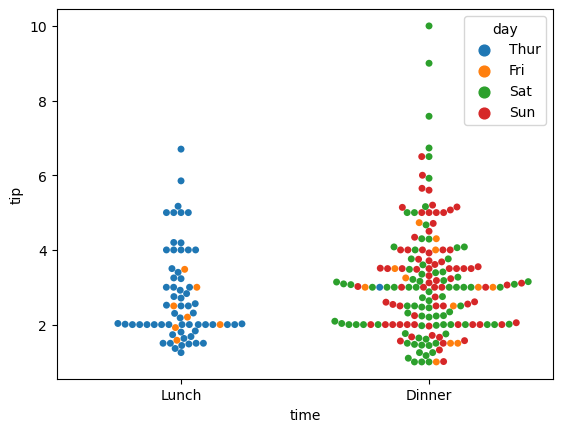

In [40]:
# swarm plot with one more categorical variable 'day'
# data specifies the DataFrame to be used
sns.swarmplot(y = 'tip', x = 'time', data = df_tips, hue = 'day')

# display the plot
plt.show()

The plot shows that the tip was collected at lunch only on Thursday and Friday. The amount of tips collected at dinner time on Saturday is the highest.

### 2.3 Distribution Plot
A seaborn provides a distplot() function to visualize a distribution of the univariate variable. This function uses matplotlib to plot a histogram and fit a kernel density estimate (KDE). 

Lets plot a distribution plot of 'total_bill' 

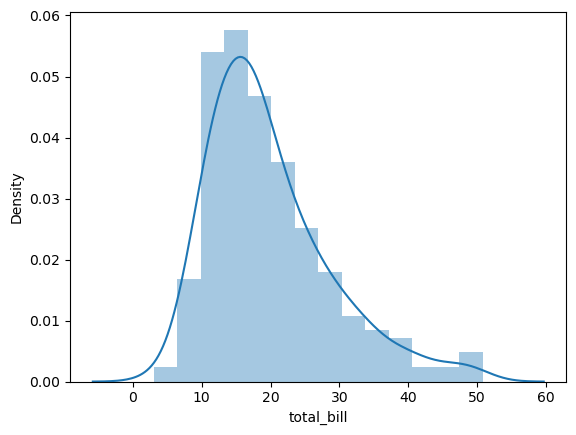

In [41]:
# plot a distribution plot
sns.distplot(df_tips['total_bill'])

# display the plot
plt.show()

We can interpret from the above plot that the total bill amount is between 10 to 20 for a large number of observations. The distribution plot can be used to visualize the total bill for different times of the day.

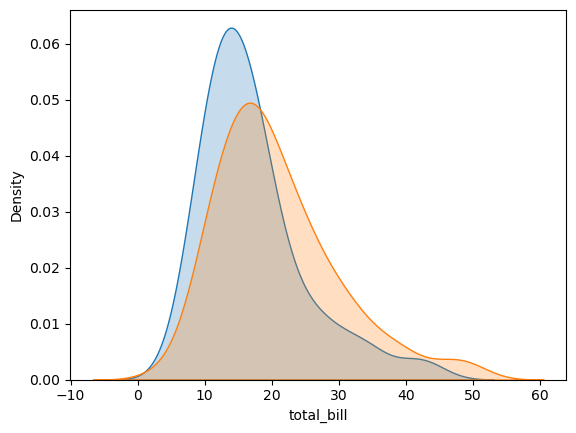

In [42]:
# iterate the distplot() function over the time

# list of time
time = ['Lunch', 'Dinner']

# iterate through time
# Draw the density plot
# 'hist = False' will not plot a histogram
# 'kde = True' plots density curve
for i in time:
    subset = df_tips[df_tips['time'] == i]
    sns.distplot(subset['total_bill'], hist = False, kde = True,
                 kde_kws = {'shade':True},
                 label = i)

It can be seen that the distribution plot for lunch is more right-skewed than a plot for dinner. This implies that the customers are spending more on dinner rather than lunch. 

### 2.4 Count Plot
Count plot shows the count of observations in each category of a categorical variable. We can add another variable using a parameter 'hue'. 

Let us plot the count of observations for each day based on time

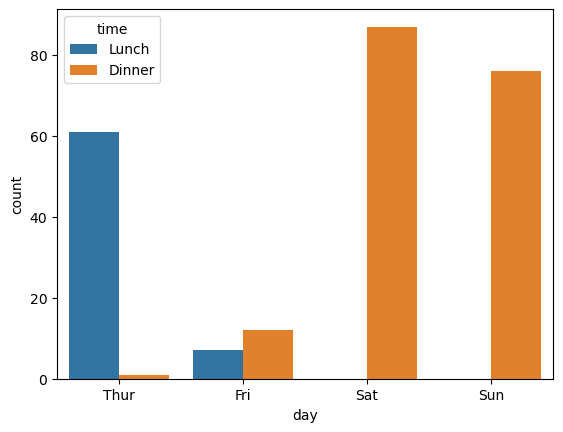

In [43]:
# count of observations for each day based on time
# set 'time' as hue parameter
# data specifies the DataFrame to be used
sns.countplot(data = df_tips, x = 'day', hue = 'time')

# display the plot
plt.show()

All the observations recorded on Saturday and Sunday are for dinner. Observations for lunch on Thursday is highest among lunchtime.

### 2.5 Regression Plot
Regression plot is a plot which gives the relationship with two quantitative variables

The line regression plot in this library plots the data and the fitted regression model.

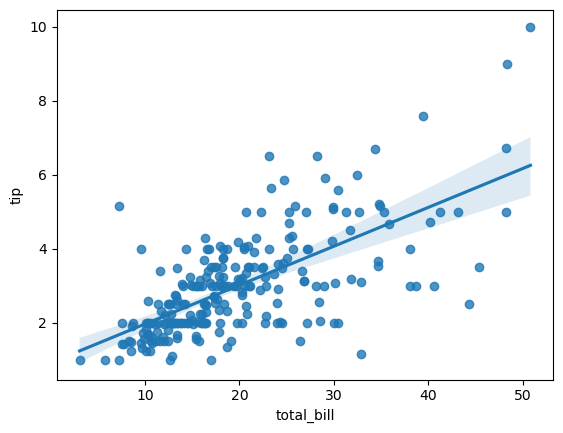

In [44]:
# plot the regression plot
# data specifies the DataFrame to be used
sns.regplot(x = "total_bill", y = "tip", data = df_tips)

# display the plot
plt.show()

The above plot is a scatter plot of the tip against the total bill. We may say as the bill amount increases the tip amount also increases, that is, there is an increasing  trend.

Let us plot a regression plot of total_bill against the size. We shall take the average of values from the 

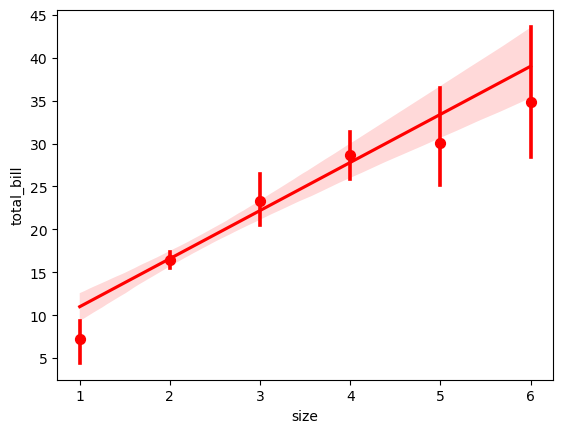

In [45]:
# plot a regression plot
# data specifies the DataFrame to be used
# 'x.estmator' is the estimate to be obtained for values taking particular value in x
# 'color' is the colour of the plot 
sns.regplot(x = "size", y = "total_bill", data = df_tips, x_estimator = np.mean, color = 'r')

# display the plot
plt.show()

We see there is a lot of variation as the size increases.

### 2.6 Point plot 
A point plot is a plot between two categorical variables and a numeric variable. It represents the measure of central tendency. The point indicates the mean and the lines indicate the variation. These plots are useful for comparison between different levels of one or more categorical variable.

Let us plot a day-wise point plot of the total_bill collected.

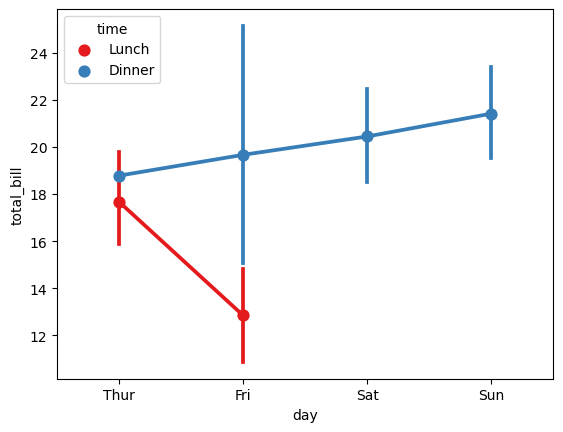

In [46]:
# plot a point plot
# data specifies the DataFrame to be used
# palette is the color palette 
sns.pointplot(x = "day", y = "total_bill", hue = "time", data = df_tips, palette = "Set1")

# display the plot
plt.show()

We see that the blue line indicates the summary statistics for dinner orders and red line indicates the summary of lunch orders
The average of total_bill for dinner is higher on all days.

### 2.5 Joint plot
A joint plot is a bivariate plot along with the distribution plot along the margins. 

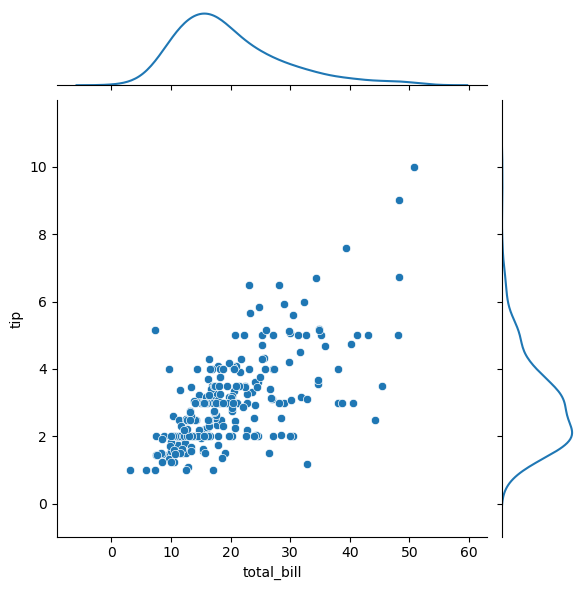

In [47]:
# plot a joint plot
# data specifies the DataFrame to be used
sns.JointGrid(x = "total_bill", y = "tip", data = df_tips).plot(sns.scatterplot, sns.kdeplot)

# display the plot
plt.show()

We see there is a nearly linear relationship between the total bill and the tip. Along the margins, we see the kernel density plot for the variables. 

It is possible to plot the distribution plot or even histogram. Also, the scatter plot can be replaced by the regression plot.

### 2.6 Violin Plot
The violin plot is similar to a box plot that features a kernel density estimation of the underlying distribution. The plot shows the distribution of numerical variables across categories of one (or more) categorical variables such that those distributions can be compared.

Let's draw a violin plot for the numerical variable 'total_bill' and a categorical variable 'day'.

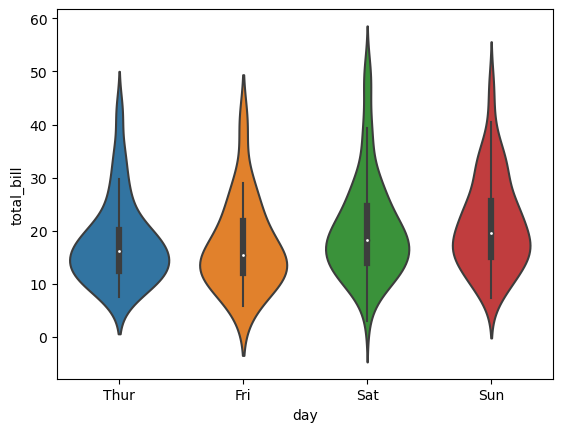

In [48]:
# violin plot
# data specifies the DataFrame to be used
sns.violinplot(y = 'total_bill', x = 'day', data = df_tips)

# display the plot
plt.show()

The above violin plot shows that the total bill distribution is nearly the same for different days. We can add another categorical variable 'sex' to the above plot to get a better insight on the bill amount distribution based on days as well as gender.

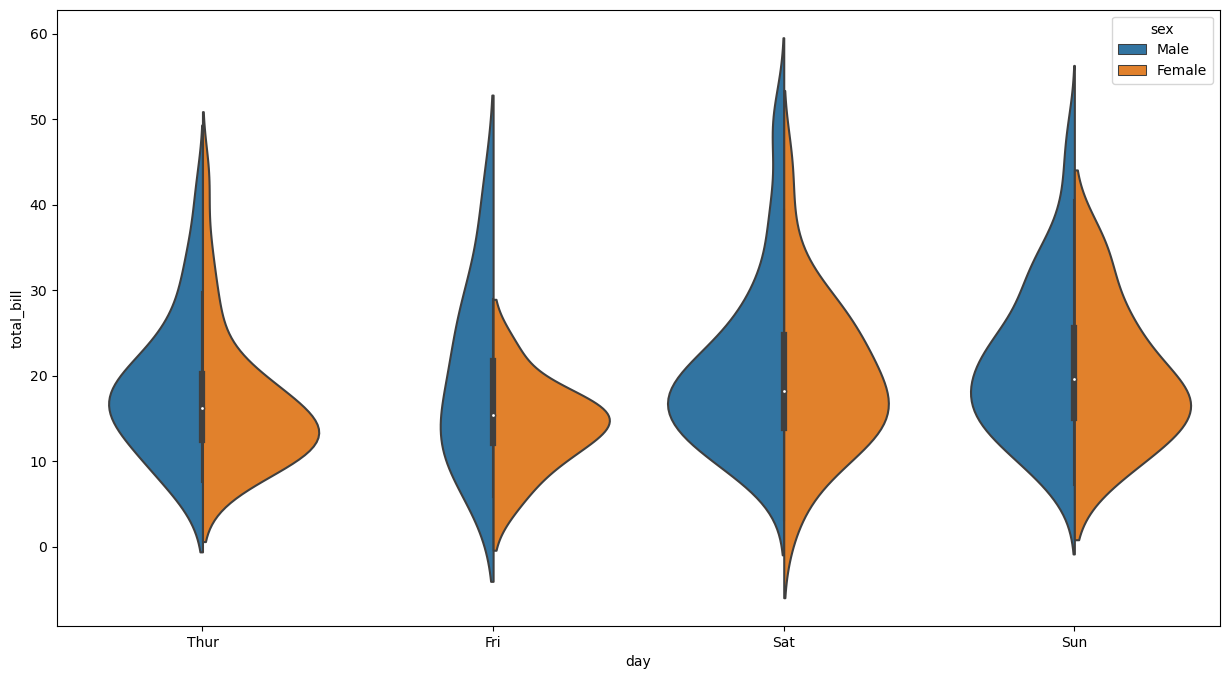

In [49]:
# set the figure size
plt.figure(figsize = (15,8))

# violin plot with addition of the variable 'sex'  
# data specifies the DataFrame to be used
# 'split = True' draws half plot for each of the category of 'sex' 
sns.violinplot(y = 'total_bill', x = 'day', data = df_tips, hue = 'sex', split = True)

# display the plot
plt.show()

There is no significant difference in the distribution of bill amount and sex.

### 2.7 Pair Plot
The pair plot gives a pairwise distribution of variables in the dataset. The pairplot() function creates a matrix such that each grid shows the relationship between a pair of variables. On the diagonal axes, a plot shows the univariate distribution of each variable.

Plot a pair plot for the tips dataset

<Figure size 1500x800 with 0 Axes>

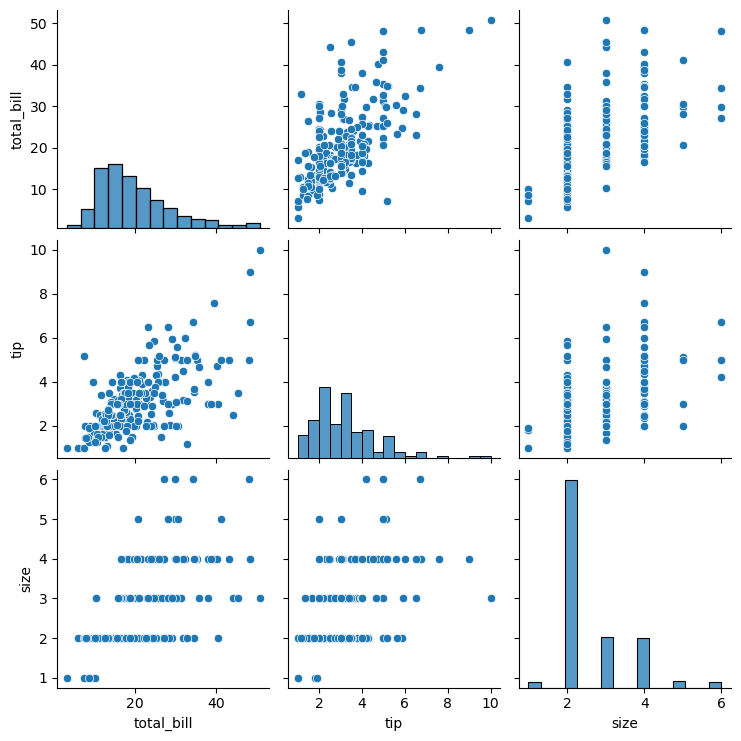

In [50]:
# set the figure size
plt.figure(figsize = (15,8))

# plot a pair plot
sns.pairplot(df_tips)

# display the plot
plt.show()

The above plot shows the relationship between all the numerical variables. 'total_bill' and 'tip' has a positive linear relationship with each other. Also, 'total_bill' and 'tip' are positively skewed. The 'size' has a significant impact on the 'total_bill', as the minimum bill amount is increasing with an increasing number of customers (size).

### 2.8 Heatmap
Heatmap is a  graphical representation of two-dimensional data. It represents the individual values that are contained in a matrix are represented as colours. <br><br>
                       Generally, the heatmap is used to the correlation matrix among numeric variables of a dataset. Each square in the heatmap shows the correlation between the two variables on each axis.

Compute correlation between the variables using .corr() function. Plot a heatmap of the correlation matrix.

In [51]:
# compute correlation
corr_matrix = df_tips.corr()

# display the correlation matrix
corr_matrix

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


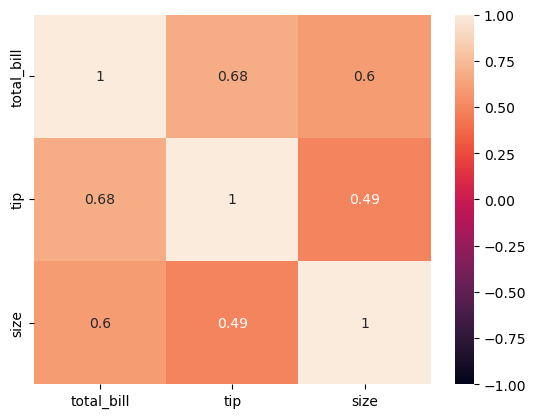

In [52]:
# plot heatmap
# 'annot=True' returns the correlation values 
# vmin is the minimum range of values
sns.heatmap(corr_matrix, annot = True, vmin = -1)

# display the plot
plt.show()

The above plot shows that there is a moderate correlation between 'total_bill' and 'tip' (0.68). The diagonal values are '1' as it is the correlation of the variable with itself.

## Power Ahead!